# Assignment 1

Below you'll find the code used to understand, prepare and model the data for the first Assignment. The question for this assignment will be answered here. For this assignment it was necessary to know which variables (JobSatisfaction, Experience, Productivity, Salary) would correlate between each other. Correlation means there is a connection between the variables, it doesn't imply there is a causality. When a correlation is high, it implies when a value increases the other value get's impacted. The correlation between variables is the strongest with the value (-)1. This means that as the value on the x-axis increases, the value on the y-axis rises proportionally by the same percentage. A 'correlation' of 0 means there ain't a correlation at al, how greater the deviation of 0 the stronger the correlation. If you use the same value you'll get a correlation of 1, which makes sense cause it adds the same ammount. So those correlation in the heatmap can be neglected. As shown in the heatmap, the strongest correlation is between Experience and Salary and after that between Job Satisfaction and Salary. This is easy to understand cause employees with more (life)experience are often getting paid more. Additionally, you feel more satisfied/happier when you receive a higher salary, as it allows you to pay off debts more easily and purchase luxury products more quickly. Though this correlation is not as high as you would think. Cause when you have in mind that a correlation of (-)1 is the highest and 0 is the lowest. That means that a correlation of 0.53 lies in the middle. As you could see in the scatterplot, the graphs are not in a perfect increasing line. Because of this and that the values in the scatterplots are mostly scattered and less grouped in a diagional line, the correlation isn't that strong. But you could see that the graphs of Job Satisfaction & Salary and Experience & Salary are more in line with a grouped diagonal line then the other graphs.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant
import numpy as np
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean, absolute
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV


In [4]:
Employee_data =pd.read_csv("1673096CompanyEmployeeData.csv")
print(Employee_data.head())

  Department  Experience    Education  Productivity  TrainingSessions  \
0     Office           7  High School             7                 2   
1   Hardware           7  High School             4                12   
2   Hardware           7     Bachelor             7                15   
3   Software           7     Bachelor            10                10   
4   Hardware           8  High School             5                12   

   RemoteWork  Salary HealthWellness  ManagementSatisfaction  \
0          37    4517             no                       8   
1          62    4197             no                       6   
2          28    4073            yes                       8   
3          22    5204             no                       6   
4          68    6085             no                       6   

   PerformanceRating  YearsActive  JobSatisfaction  
0                  8            1               66  
1                  6            3               24  
2                

<Figure size 640x480 with 0 Axes>

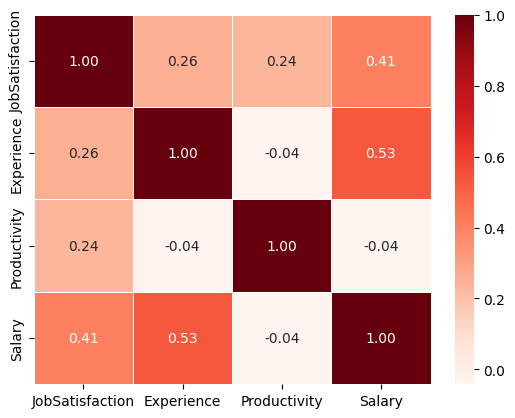

<Figure size 640x480 with 0 Axes>

In [5]:
selected_columns = ['JobSatisfaction', 'Experience', 'Productivity', 'Salary']
Employee_selected = Employee_data[selected_columns]
matrix = Employee_selected.corr()

sn.heatmap(matrix, annot=True, cmap="Reds", cbar=True, linewidths=0.5, fmt=".2f")
plt.figure()

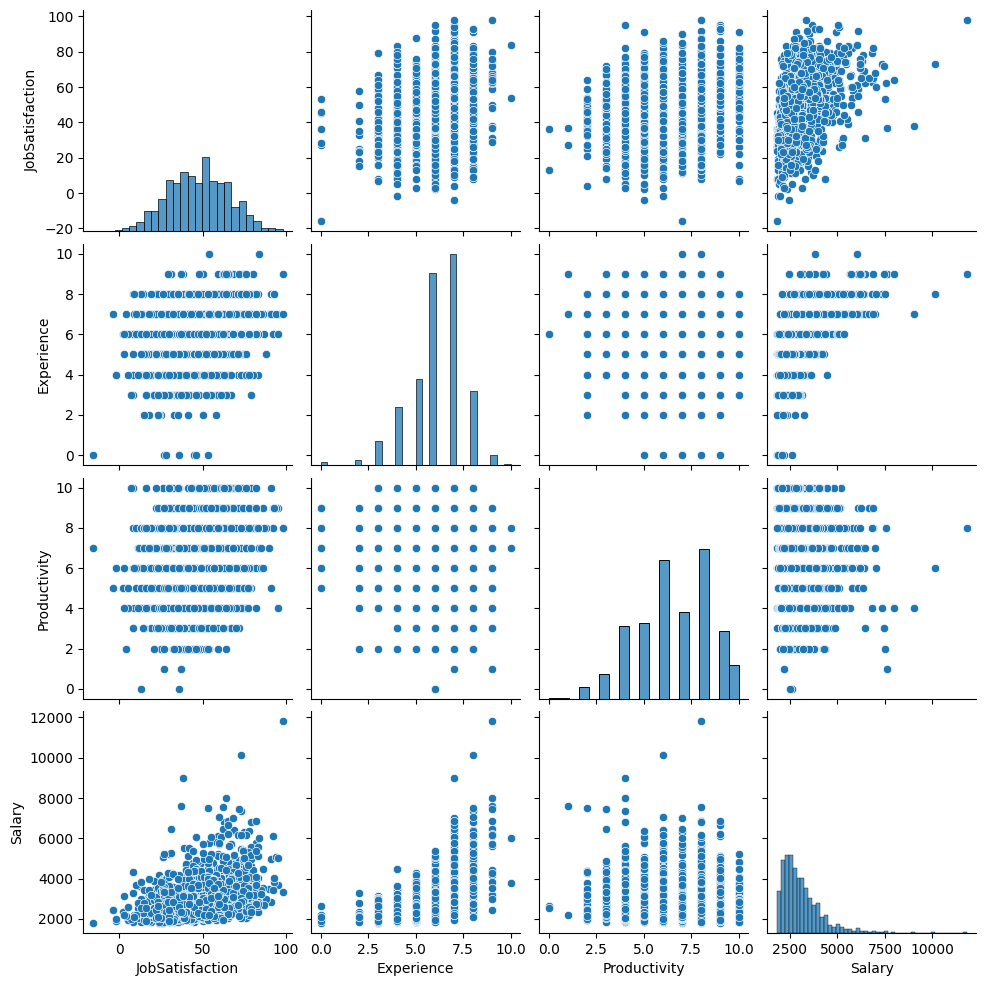

In [6]:
sn.pairplot(Employee_selected)

plt.show()

# Assignment 2

Below you'll find the code used for Assignment 2. Firstly I created dummies, so we could use them in a regression model and removed the 'old' columns of the dummies I created. After that I renamed the column Education_High School cause otherwise it couldn't be used. After that I made a regression model with all the variables, which showcase that JobSatisfaction could be explained for about 42% with all those variables. But the chance of a coincidence is very high. I checked if the variables had multicollinearity, this means when the VIF of independent variables is above 5 that those variables could be dependant on each other. When checking for the multicollinearity I found out that the variables ManagementSatisfaction and PerformanceRating had a high (25) VIF, this meant I had to remove one of these variables to get a regression model where the independant variables aren't dependant on each other. There was also an infinite multicollinearity amongst the dummie variable. This is logical, because when 1 variable is True(/1) the other variables are False(/0) and vice versa. When removing one variable the multicollinearity will fall away. After that I created a regression model without PerformanceRating and also removed 1 variable per dummie. JobSatisfaction will still be explained for 42% with the removal of some variables and there's also no multicollinearity in the latest regression model. But still I wouldn't advice relying on the regression model because the probability of some variables are very high, which means there is a high chance of a coincidence. Then I created an APA table from the model, the final version is the one directly below this markdown.

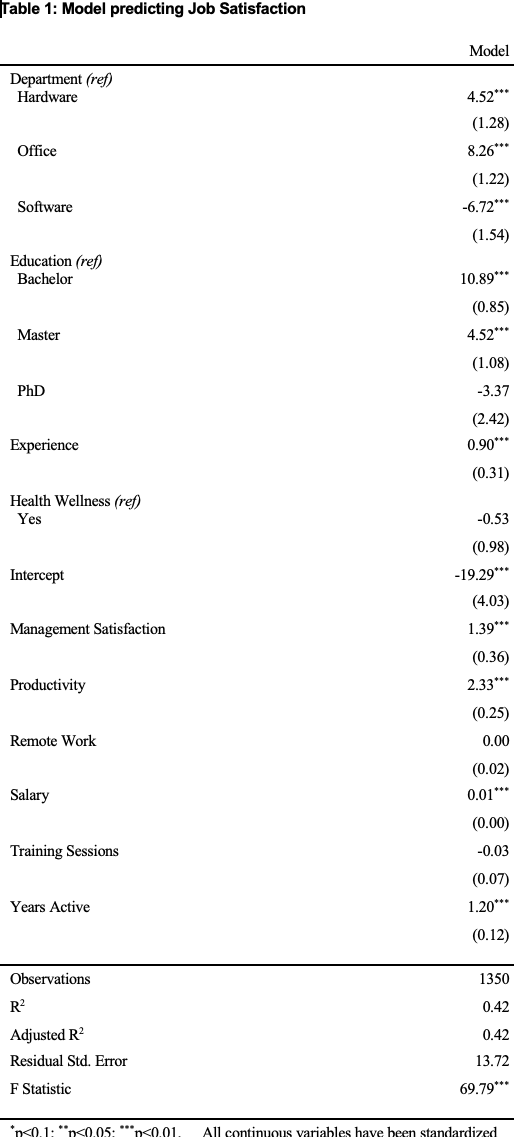

In [7]:
Employee_dummies = pd.get_dummies(Employee_data[['Department','Education','HealthWellness']], dtype = int)
Employee_data2 = pd.concat([Employee_data,Employee_dummies], axis=1)
Employee_data2 = Employee_data2.select_dtypes(include=['number'])
Employee_data2.head()

,Experience,Productivity,TrainingSessions,RemoteWork,Salary,ManagementSatisfaction,PerformanceRating,YearsActive,JobSatisfaction,Department_Hardware,Department_Office,Department_Other,Department_Software,Education_Bachelor,Education_High School,Education_Master,Education_PhD,HealthWellness_no,HealthWellness_yes
0,7,7,2,37,4517,8,8,1,66,0,1,0,0,0,1,0,0,1,0
1,7,4,12,62,4197,6,6,3,24,1,0,0,0,0,1,0,0,1,0
2,7,7,15,28,4073,8,8,2,67,1,0,0,0,1,0,0,0,0,1
3,7,10,10,22,5204,6,6,3,59,0,0,0,1,1,0,0,0,1,0
4,8,5,12,68,6085,6,6,2,59,1,0,0,0,0,1,0,0,1,0


In [8]:
Employee_data2 = Employee_data2.rename(columns={'Education_High School': 'Education_High_School'})
Every_column = Employee_data2.columns.difference(['JobSatisfaction'])
formula = f"JobSatisfaction ~ {' + '.join(Every_column)}"

model1 = sm.ols(formula, data=Employee_data2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     65.13
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          3.16e-147
Time:                        12:02:31   Log-Likelihood:                -5442.9
No. Observations:                1350   AIC:                         1.092e+04
Df Residuals:                    1334   BIC:                         1.100e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7

In [9]:
X = Employee_data2.select_dtypes(include=[np.number]).dropna()
X = add_constant(X)

VIF_data = pd.DataFrame()
VIF_data["variable"] = X.columns
VIF_data["VIF"] = [vif(X,i)
    for i in range(len(X.columns))]
print(VIF_data)

                  variable        VIF
0                    const   0.000000
1               Experience   1.411141
2             Productivity   1.811394
3         TrainingSessions   1.012639
4               RemoteWork   1.010761
5                   Salary   1.665605
6   ManagementSatisfaction  25.433370
7        PerformanceRating  25.445594
8              YearsActive   1.083555
9          JobSatisfaction   1.732386
10     Department_Hardware        inf
11       Department_Office        inf
12        Department_Other        inf
13     Department_Software        inf
14      Education_Bachelor        inf
15   Education_High_School        inf
16        Education_Master        inf
17           Education_PhD        inf
18       HealthWellness_no        inf
19      HealthWellness_yes        inf


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [10]:
Reference_dummies = Employee_data2[['Department_Other','Education_High_School','HealthWellness_no']]
X = Employee_data2.drop(columns=Reference_dummies).select_dtypes(include=[np.number]).dropna()
X = add_constant(X)

VIF_data = pd.DataFrame()
VIF_data["variable"] = X.columns
VIF_data["VIF"] = [vif(X,i)
    for i in range(len(X.columns))]
print(VIF_data)

                  variable         VIF
0                    const  118.421076
1               Experience    1.411141
2             Productivity    1.811394
3         TrainingSessions    1.012639
4               RemoteWork    1.010761
5                   Salary    1.665605
6   ManagementSatisfaction   25.433370
7        PerformanceRating   25.445594
8              YearsActive    1.083555
9          JobSatisfaction    1.732386
10     Department_Hardware    2.746780
11       Department_Office    2.610215
12     Department_Software    1.684766
13      Education_Bachelor    1.429749
14        Education_Master    1.268288
15           Education_PhD    1.063798
16      HealthWellness_yes    1.020604


In [11]:
Employee_data3 = Employee_data2.drop(columns=['PerformanceRating']).drop(columns=Reference_dummies)
Every_column2 = Employee_data3.columns.difference(['JobSatisfaction'])
formula2 = f"JobSatisfaction ~ {' + '.join(Every_column2)}"

model2 = sm.ols(formula2, data=Employee_data3).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     69.79
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          4.44e-148
Time:                        12:02:31   Log-Likelihood:                -5443.0
No. Observations:                1350   AIC:                         1.092e+04
Df Residuals:                    1335   BIC:                         1.099e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -19

In [12]:
Table = Stargazer([model2])
Table.title("<b>Table 1: Model predicting Job Satisfaction</b>")
Table.custom_columns(["Model"])
#Tried to remove the dependant variable text, the (1) under Model and replace the independant variables _ with space but the code didn't work

html_output = Table.render_html()
HTML(html_output)

# Assignment 3

As you could see in Assignment 2, we had a dependant variable and a lot of independant variables. But what does those terms mean? Well, the dependant variable is the variable/value that you want to explain. For example, if you want to explain salary then salary is the dependant variable. To explain the dependant variable you need other variables which are called independant variables. This means that the dependant variable depends on the other variables, the impact of the independant variable differ. One variable explains more about the dependant variable and another less. You could see it as a slice of pie, when every variable together explains for 100% the dependant variable. If you take out a slice (an independant variable) then the dependant variable will be explained for less then 100%, for example 98%. Well another slice(/indepndant variable) could explain it for 40% for example, if you take that one out the dependant variable will be less explainable with the independant variables who are left (58%).

Below you'll find the code to explain which variable is more impactful for the Job Satisfaction. But before we can make the model, we first have to standardscale the variables. This because the scale of the values are different. The values for the Education are for a fact only 1's and 0's, while YearsActive are probably between 0 and 30 and Salary will be much higher. This means we have to scale the values on a similar level, that's where the standardscaler comes in. To know which variable has the most impact, you'll have to look at the co-efficient (coef). How more it deviates the larger the impact on the dependant variable. When Job Satisfaction increases by 1 the Salary will increase by 7.4, YearsActive by 3.6 and PhD Education will decrease by 1.3. I've compared every education and the results of the other Education were: High School: -3.6; Bachelor: 4.5; Master: -0.8; And the sum is -1.2. Before making a conclusion, we have to review the p-value's (P>|t|). If they are below 0.05 it means they are significant which means we can draw conclusions about the results. In this case group 1 is right, the Salary has the most impact, because it has the highest co-efficient (7.4).

In [13]:
Employee_data4 = Employee_data2.copy()
Employee_data4[['Salary','YearsActive',"Education_PhD"]] = StandardScaler().fit_transform(Employee_data4[['Salary','YearsActive',"Education_PhD"]])

model3 = sm.ols("JobSatisfaction ~ Salary + YearsActive + Education_PhD", data=Employee_data4).fit()
print(model3.summary())
#High School: -3.6 ; Bachelor: 4.5 ; Master: -0.8 ; PhD: -1.3 ; Sum: -1.2

                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     121.9
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           7.21e-70
Time:                        12:02:31   Log-Likelihood:                -5651.5
No. Observations:                1350   AIC:                         1.131e+04
Df Residuals:                    1346   BIC:                         1.133e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        47.5481      0.434    109.602

# Assignment 4

Below you'll find the code for Assignment 4. After using a normal linear regression with a cross validation of 5 folds and mean absolute deviation. The average prediction error is 295967. After that I used GridSearch and cross validation for the Lasso and Ridge regressions to find out what the optimal alpha values are. After a bit of changing the start and stop values. I've found out that the best alpha values are 16469 for Lasso and 31 for Ridge. The average prediction error for Lasso is 262704 and for Ridge it is 268601, which are both lower then the normal linear regression. Lasso is in this case better. Then I created a Neural Network with the given hyperparameters, as a result of the Neural Network the average prediction error was 121714. As you could see is te the average prediction way lower then with the other regressions, it's even less than half which is incredibly good. Because how lower the error, how better the model works.

In [14]:
Car_data =pd.read_csv("1673096car_data.csv")
print(Car_data.head())

   year  selling_price  km_driven    fuel seller_type transmission  \
0  2012         175000      60000  Diesel  Individual       Manual   
1  2011         450000     110000  Petrol  Individual       Manual   
2  2009         101000      90000  Petrol  Individual       Manual   
3  2006          50000      40000  Petrol  Individual       Manual   
4  2015         300000      50000  Petrol  Individual       Manual   

                  owner  mileage  engine  max_power  seats  
0           First Owner    22.30    1248       74.0    5.0  
1           Third Owner    16.80    1497      116.4    5.0  
2  Fourth & Above Owner    19.70     796       35.0    8.0  
3           Third Owner    16.10     796       37.0    4.0  
4           First Owner    22.74     796       47.3    5.0  


In [15]:
Car_data2 = Car_data.dropna()
y = Car_data2['selling_price']
X = Car_data2.select_dtypes(exclude=['object']).drop('selling_price', axis=1)
X = pd.get_dummies(X, drop_first = True)

cv = RepeatedKFold(n_splits=5)

lm = LinearRegression()
lmscores = cross_val_score(lm,X,y,scoring='neg_mean_absolute_error', cv=cv)

lmMAE = mean(absolute(lmscores))
print('the average prediction error with full data is %.0f' % lmMAE)

the average prediction error with full data is 295742


In [16]:
columns = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

In [17]:
alpha_range = np.arange(start=16400,stop=16500,step=1)

cv = RepeatedKFold(n_splits=5)
param = {'alpha':alpha_range}
LassoModel = Lasso()

LassoM = GridSearchCV(LassoModel,param_grid=param,scoring='neg_mean_absolute_error', cv=cv)
LassoM.fit(X,y)
print("Best Alpha: ",LassoM.best_params_['alpha'])

Best Alpha:  16445


/home/codespace/.python/current/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [18]:
alpha_range = np.arange(start=10,stop=40,step=1)

cv = RepeatedKFold(n_splits=5)
param = {'alpha':alpha_range}
RidgeModel = Ridge()

RidgeM = GridSearchCV(RidgeModel, param_grid=param, scoring='neg_mean_absolute_error', cv=cv)
RidgeM.fit(X, y)
print("Best Alpha: ", RidgeM.best_params_['alpha'])

Best Alpha:  31


/home/codespace/.python/current/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [19]:
LassoModel = Lasso(alpha=16469)
scoreslasso = cross_val_score(LassoModel,X,y,scoring='neg_mean_absolute_error', cv=cv)
lassoMAE = mean(absolute(scoreslasso))
print('the average prediction error with full data is %.0f' % lassoMAE)

the average prediction error with full data is 262619


In [20]:
RidgeModel = Ridge(alpha=31)
scoresridge = cross_val_score(RidgeModel,X,y,scoring='neg_mean_absolute_error', cv=cv)
ridgeMAE = mean(absolute(scoresridge))
print('the average prediction error with full data is %.0f' % ridgeMAE)

the average prediction error with full data is 268606


In [24]:
def create_baseline():

    nnmodel = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    nnmodel.compile(loss='mean_absolute_error',
                    optimizer='adam',
                    metrics=['mae'])
    return nnmodel

estimator = KerasRegressor(build_fn=create_baseline,
                           epochs=100, batch_size=128,
                           verbose=0)

kfold = RepeatedKFold(n_splits=5, n_repeats=1)
results = cross_val_score(estimator, X, y, cv=kfold,scoring='neg_mean_absolute_error')
print('the average prediction error is: %.0f' % mean(absolute(results)))



/home/codespace/.python/current/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/codespace/.python/current/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/codespace/.python/current/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/codespace/.python/current/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error inste

the average prediction error is: 121714
